# SoLEXS Data Analysis Documentation
 
##### Author - **Prakhar Singh**  

Email: prakhar.aries@gmail.com 

Affiliation: Aryabhatta Research Institute of Observational Sciences (ARIES)

Date: May 22, 2025  

Project: Aditya-L1 10th Workshop/ SoLEXS Data Analysis

---
##### Purpose

This code aims to **read, analyze, and visualize various data products** from the **SoLEXS instrument** onboard **Aditya-L1**, India’s first space-based solar observatory.

The goal is to understand solar X-ray emissions by analyzing time-series and spectral data, using different file formats.

---

##### Types of Files

| Extension | Type                             | Description |
|----------|----------------------------------|-------------|
| `.gti`   | Good Time Interval               | Defines valid observation intervals when the detector was operational |
| `.lc`    | Light Curve                      | Time-series count data (counts per second) for studying temporal behavior |
| `.pi`    | Pulse Invariant Spectrum         | Channelized photon counts over time; used for spectral analysis (Type II Pulse Invariant File)|
| `.arf`   | Ancillary Response File          | Effective area vs energy; used to convert counts into physical flux units |
| `.rmf`   | Redistribution Matrix File       | Describes how true photon energies are redistributed into observed channels; models energy resolution |

---

##### Software Tools

You need to install the **SoLEXS Tool**. This can be downloaded from:
🔗 [Download SoLEXS Tools](https://pradan.issdc.gov.in/al1/protected/miscDownloads.xhtml )

You may need login credentials to acesss data or software packages.

Follow the SoLEXS Data Analysis Guide to install SolEXS tools.

---


In [1]:
import numpy as np
from astropy.io import fits  
import matplotlib.pyplot as plt
import numpy as np
from astropy.time import Time
import matplotlib.dates as mdates
from datetime import datetime, timezone, timedelta

#import scienceplots
#plt.style.use(['science','grid'])


# Good time interval (gti) file

In [7]:
gti_filename = '/Users/prakhar/Work/Work/Aditya_L1_10_workshop/Data/AL1_SLX_L1_20240912_v1.1/SDD2/AL1_SOLEXS_20240912_SDD2_L1.gti.gz'

with fits.open(gti_filename) as hdus_gti:
    hdus_gti.info()
    gti_table = hdus_gti[1].data
    gti_start = gti_table['START']
    gti_stop = gti_table['STOP'] 
    
    for i in range(len(gti_table)):
        print(f"Interval {i+1}: Start = {gti_table[i][0]}, Stop = {gti_table[i][1]}")


Filename: /Users/prakhar/Work/Work/Aditya_L1_10_workshop/Data/AL1_SLX_L1_20240912_v1.1/SDD2/AL1_SOLEXS_20240912_SDD2_L1.gti.gz
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      17   ()      
  1  GTI           1 BinTableHDU     24   3R x 2C   [D, D]   
Interval 1: Start = 1726099200.0, Stop = 1726099205.0
Interval 2: Start = 1726099207.0, Stop = 1726121753.0
Interval 3: Start = 1726124497.0, Stop = 1726185599.0


# Lightcurve (lc) File

Filename: /Users/prakhar/Work/Work/Aditya_L1_10_workshop/Data/AL1_SLX_L1_20240912_v1.1/SDD2/AL1_SOLEXS_20240912_SDD2_L1.lc.gz
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      15   ()      
  1  RATE          1 BinTableHDU     39   86400R x 2C   [D, D]   


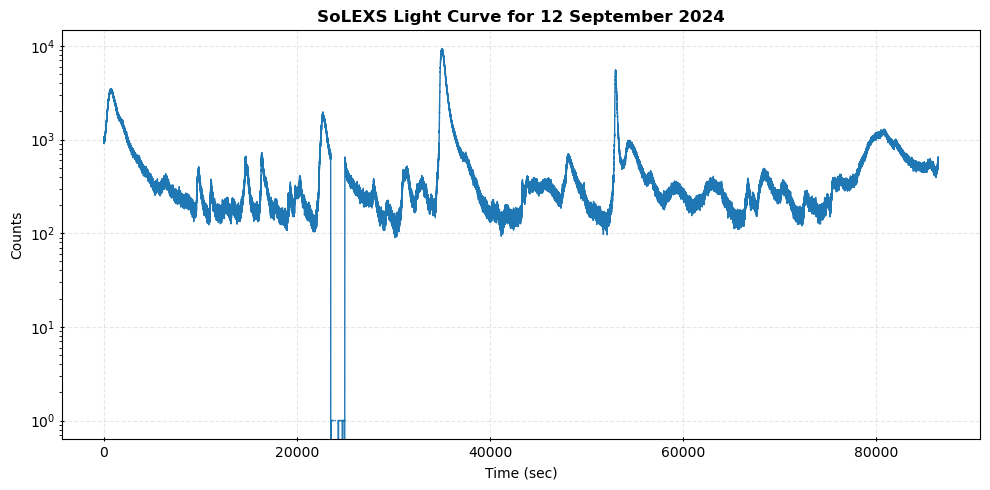

In [3]:
lc_filename = '/Users/prakhar/Work/Work/Aditya_L1_10_workshop/Data/AL1_SLX_L1_20240912_v1.1/SDD2/AL1_SOLEXS_20240912_SDD2_L1.lc.gz'
with fits.open(lc_filename) as hdus_lc:
    hdus_lc.info()
    data_lc = hdus_lc[1].data       # hdus_lc['RATE'].data
    # Extract time and rate arrays
    time = data_lc['TIME']- data_lc['TIME'][0] 
    counts = hdus_lc[1].data['COUNTS'] 

time_index=35000
fig, ax = plt.subplots(figsize=(10, 5))
ax.semilogy(time, counts, drawstyle='steps-mid', lw=1)

ax.set_xlabel('Time (sec)')
ax.set_ylabel('Counts')
obs_date = datetime.fromisoformat(hdus_lc[1].header['DATE-OBS'].strip())
ax.set_title(f"SoLEXS Light Curve for {obs_date.strftime('%d %B %Y')}", fontsize=12, weight="bold")
ax.grid(True, which='major', linestyle='--', alpha=0.3)
#ax.axvline(time_index,color='red', linestyle='--', lw=1)
ax.tick_params(direction='inout', which='major')
plt.tight_layout()
plt.show()

### Light curve in UTC

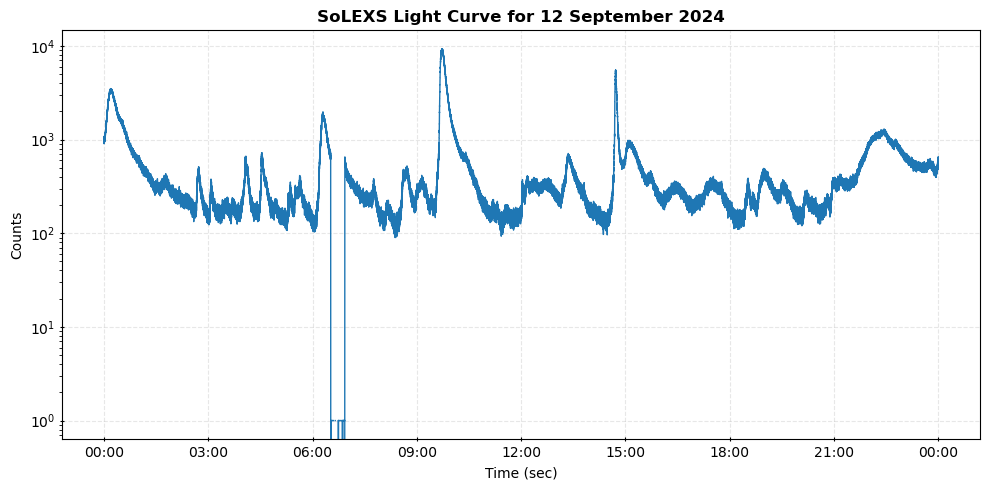

In [5]:
with fits.open(lc_filename) as hdus_lc:
    data_lc = hdus_lc[1].data       # hdus_lc['RATE'].data
    # Extract time and rate arrays
    time = data_lc['TIME']
    counts = hdus_lc[1].data['COUNTS'] 

fig, ax = plt.subplots(figsize=(10, 5))

plot_times_UTC = [datetime.fromtimestamp(t, tz=timezone.utc) for t in time]
ax.semilogy(plot_times_UTC, counts, drawstyle='steps-mid', lw=1)

ax.set_xlabel('Time (sec)')
ax.set_ylabel('Counts')
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M', tz=timezone.utc))
obs_date = datetime.fromisoformat(hdus_lc[1].header['DATE-OBS'].strip())
ax.set_title(f"SoLEXS Light Curve for {obs_date.strftime('%d %B %Y')}", fontsize=12, weight="bold")
ax.grid(True, which='major', linestyle='--', alpha=0.3)
ax.tick_params(direction='inout', which='major')
plt.tight_layout()
plt.show()


### Lightcurve with GTI plotted

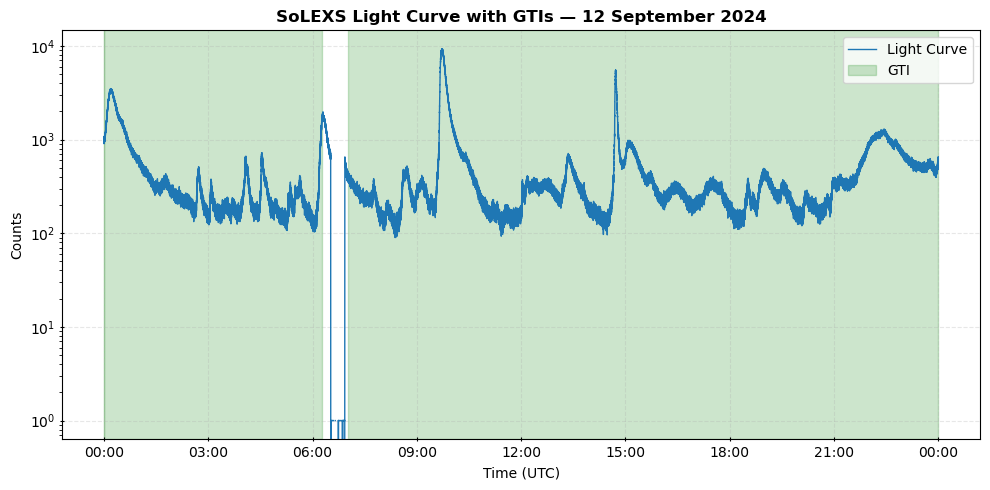

In [10]:
ref_time = datetime.fromtimestamp(0, tz=timezone.utc)

plot_times_UTC = [ref_time + timedelta(seconds=t) for t in time]
gti_starts_UTC = [ref_time + timedelta(seconds=t) for t in gti_start]
gti_stops_UTC = [ref_time + timedelta(seconds=t) for t in gti_stop]

# -------------------------------
# 4. Plot Light Curve
# -------------------------------
fig, ax = plt.subplots(figsize=(10, 5))
ax.semilogy(plot_times_UTC, counts, drawstyle='steps-mid', lw=1, label='Light Curve')

# -------------------------------
# 5. Highlight GTIs
# -------------------------------
for start, stop in zip(gti_starts_UTC, gti_stops_UTC):
    ax.axvspan(start, stop, color='green', alpha=0.2, label='GTI' if start == gti_starts_UTC[0] else None)

# -------------------------------
# 6. Add labels and formatting
# -------------------------------
ax.set_xlabel('Time (UTC)')
ax.set_ylabel('Counts')
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M', tz=timezone.utc))
obs_date = datetime.fromisoformat(hdus_lc[1].header['DATE-OBS'].strip())
ax.set_title(f"SoLEXS Light Curve with GTIs — {obs_date.strftime('%d %B %Y')}", fontsize=12, weight="bold")
ax.grid(True, linestyle='--', alpha=0.3)
ax.tick_params(direction='inout')
ax.legend()
plt.tight_layout()
plt.show()


# Spectrum (pi) file 
Type II Pulse Invariant file

Filename: /Users/prakhar/Work/Work/Aditya_L1_10_workshop/Data/AL1_SLX_L1_20240912_v1.1/SDD2/AL1_SOLEXS_20240912_SDD2_L1.pi.gz
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      22   ()      
  1  SPECTRUM      1 BinTableHDU     44   86400R x 6C   [D, D, J, 340K, 340D, D]   
Number of rows: 86400
Column names: ['TSTART', 'TELAPSE', 'SPEC_NUM', 'CHANNEL', 'COUNTS', 'EXPOSURE']


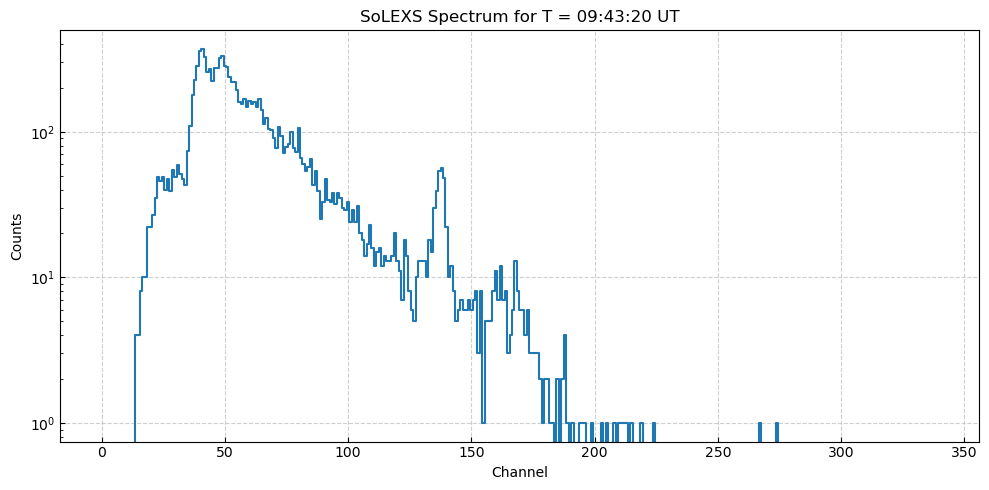

In [11]:
# Load the PI file
pi_filename = '/Users/prakhar/Work/Work/Aditya_L1_10_workshop/Data/AL1_SLX_L1_20240912_v1.1/SDD2/AL1_SOLEXS_20240912_SDD2_L1.pi.gz'


with fits.open(pi_filename) as hdus_pi:
    hdus_pi.info()
    data_pi  = hdus_pi[1].data  # hdus_pi['SPECTRUM'].data
    header_pi = hdus_pi[1].header
    
# Choose the time index to inspect
time_index = 35000
n_rows = len(data_pi )
print(f"Number of rows: {n_rows}")
print(f"Column names: {data_pi .names}")
# Extract energy channels and counts for that time
channels = data_pi ['CHANNEL'][time_index]
counts = data_pi ['COUNTS'][time_index]
tstart = data_pi ['TSTART'][time_index]

# Convert the TSTART values to UTC
# Note: TSTART is in Unix time (seconds since 1970-01-01T00:00:00)
unix_times = np.array(data_pi ['TSTART'])  
times_utc = Time(unix_times, format='unix', scale='utc')
#print(times_utc.iso)

fig, ax = plt.subplots(figsize=(10, 5))

ax.step(channels, counts, where='mid') # for combined time bins
ax.set_xlabel('Channel')
ax.set_ylabel('Counts')
ax.set_yscale('log')
ax.set_title(f'SoLEXS Spectrum for T = {times_utc.iso[time_index][11:19]} UT')
#ax.set_title(f'SoLEXS Spectrum for T = {tstart} UT')
ax.grid(True, linestyle='--', alpha=0.6)
ax.tick_params(axis='both', direction='in', which='both')
ax.semilogy() 
#plt.savefig("/home/solararies/Documents/spectrum.png",dpi=300)
plt.tight_layout()
plt.show()

### Ploting using combined Time bins

Filename: /Users/prakhar/Work/Work/Aditya_L1_10_workshop/Data/AL1_SLX_L1_20240912_v1.1/SDD2/AL1_SOLEXS_20240912_SDD2_L1.pi.gz
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      22   ()      
  1  SPECTRUM      1 BinTableHDU     44   86400R x 6C   [D, D, J, 340K, 340D, D]   


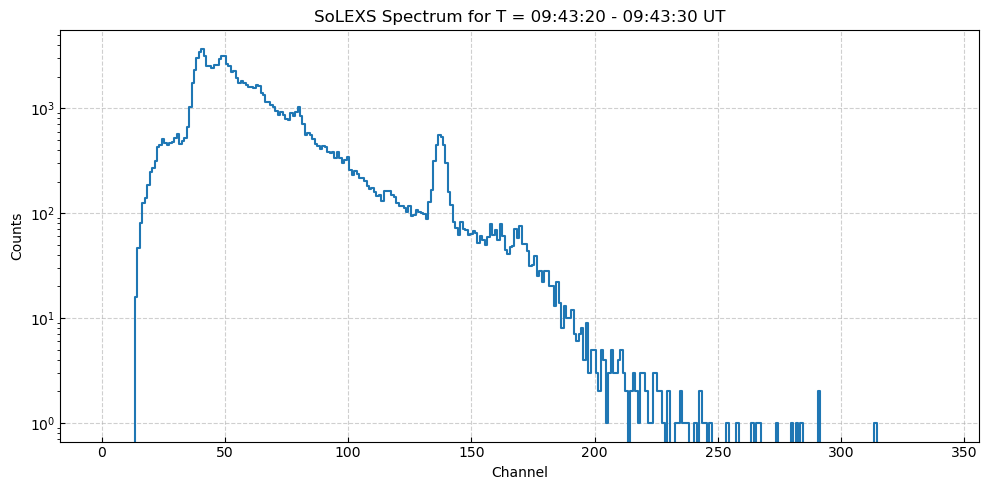

In [12]:
with fits.open(pi_filename) as hdus_pi:
    hdus_pi.info()
    data_pi = hdus_pi[1].data  # Spectrum extension, often EXTNAME='SPECTRUM'
    header_pi = hdus_pi[1].header
# Choose the time index to inspect
time_index = 35000

# Extract energy channels and counts for that time
channels = data_pi ['CHANNEL'][time_index]
counts = data_pi ['COUNTS'][time_index]
tstart = data_pi ['TSTART'][time_index]

# Convert the TSTART values to UTC
# Note: TSTART is in Unix time (seconds since 1970-01-01T00:00:00)
unix_times = np.array(data_pi ['TSTART']) 
times_utc = Time(unix_times, format='unix', scale='utc')

# Optional: Combine multiple time bins to improve signal
n_bins_to_combine = 10
counts_combined = sum(data_pi ['COUNTS'][time_index + i] for i in range(n_bins_to_combine))

fig, ax = plt.subplots(figsize=(10, 5))

#ax.plot(channels, counts)      # for individual time bin
ax.step(channels, counts_combined, where='mid') # for combined time bins
ax.set_xlabel('Channel')
ax.set_ylabel('Counts')
ax.set_yscale('log')
ax.set_title(f'SoLEXS Spectrum for T = {times_utc.iso[time_index][11:19]} - { times_utc.iso[time_index + n_bins_to_combine][11:19]} UT')
#ax.set_title(f'SoLEXS Spectrum for T = {tstart:.1f}  - {tstart+n_bins_to_combine:.1f} s ')
ax.grid(True, linestyle='--', alpha=0.6)
ax.tick_params(axis='both', direction='in')
ax.semilogy()  
  
plt.tight_layout()
plt.show()

# Calibration Database (CALDB)

The Calibration Database (CALDB) for SoLEXS provides essential files that describe the instrument’s response characteristics. These files are crucial for converting raw photon counts into meaningful physical parameters during spectral analysis. The CALDB is organized to include:

• Auxiliary Response File (ARF)

• Redistribution Matrix File (RMF)

• Ebounds File


The CALDB files are stored within the directory structure of the SoLEXS Tools package, and their
paths are automatically resolved during the installation.

In [16]:
#Change the path according to your system

arf_filename = '/Users/prakhar/Software/solexs_tools-1.1/CALDB/arf/solexs_arf_SDD2_v1.arf'
ebounds_filename = '/Users/prakhar/Software/solexs_tools-1.1/CALDB/ebounds/energy_bins_out_SDD2_v1.dat'
rmf_filename = '/Users/prakhar/Software/solexs_tools-1.1/CALDB/response/rmf/solexs_gaussian_SDD2_v1.rmf'

## Ebounds File

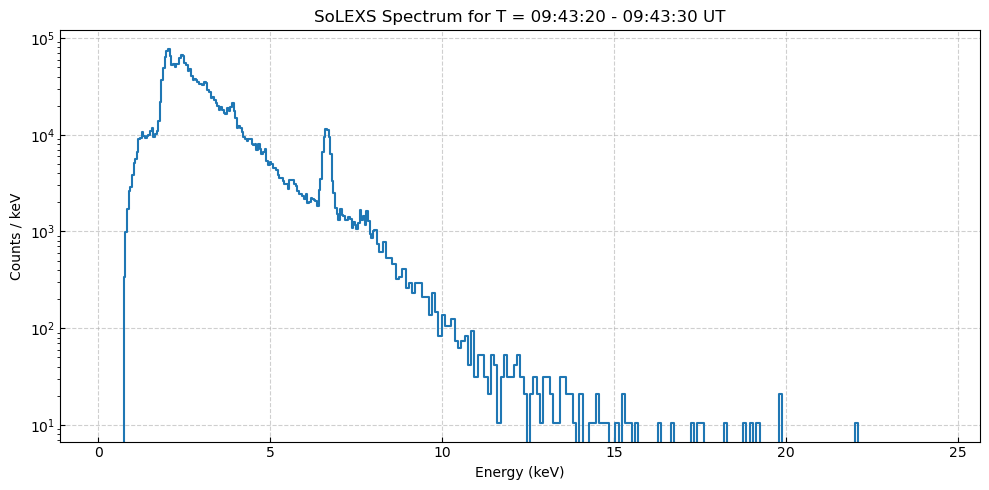

In [14]:

# Load energy bounds
ebounds_filename = '/Users/prakhar/Software/solexs_tools-1.1/CALDB/ebounds/energy_bins_out_SDD2_v1.dat'
ebounds_data = np.loadtxt(ebounds_filename)
#print(ebounds_data.shape)

#Column 0 = lower energy bound (keV)
#Column 1 = upper energy bound (keV)

energies_lo = ebounds_data[:, 0]
energies_hi = ebounds_data[:, 1]
energies_mid = (energies_lo + energies_hi) / 2
ediff = ebounds_data[:,1] - ebounds_data[:,0]  # energy bin widths
#print(ediff)    # after channel 168 width changes from 0.047 to 0.095 
 
# Choose time index
time_index = 35000
counts = data_pi['COUNTS'][time_index]
tstart = data_pi['TSTART'][time_index]

# Combine a few time bins for better statistics (optional)
n_bins_to_combine = 10
counts_combined = sum(data_pi ['COUNTS'][time_index + i] for i in range(n_bins_to_combine))

# Because not all energy bins are equally wide!
# How many photons were detected per keV of energy bandwidth
counts_per_kev = counts_combined / ediff      

tstart_unix = data_pi['TSTART'][time_index] 
tstop_unix = data_pi['TSTART'][time_index + n_bins_to_combine]

tstart_utc = Time(tstart_unix, format='unix', scale='utc')
tstop_utc = Time(tstop_unix, format='unix', scale='utc')
tstart_str = tstart_utc.strftime('%H:%M:%S')
tstop_str = tstop_utc.strftime('%H:%M:%S')

# Plot
fig, ax = plt.subplots(figsize=(10, 5))
ax.step(energies_mid, counts_per_kev, where='mid')
ax.set_xlabel('Energy (keV)')
ax.set_ylabel('Counts / keV')
ax.set_title(f'SoLEXS Spectrum for T = {tstart_str} - {tstop_str} UT')
ax.grid(True, linestyle='--', alpha=0.6)
ax.semilogy()
ax.tick_params(axis='both', direction='in')

plt.tight_layout()
plt.show()

# Instrument Response 

1 -  Response(Redistribution) matrix Function(RMF) / Spectral Redistribution Function (SRF)

2 -  Auxiliary Response File (arf)/ Effective Area

## Auxiliary Response File (arf)

> An ARF file defines the effective collecting area (cm²) of the instrument as a function of photon energy. It's essential when converting detector counts into photon flux.

How much photon flux reaches the detector per unit incident flux — essentially, how "sensitive" the instrument is at each energy.

A higher value means more photons are being collected (better sensitivity).

The shape of this curve is used during spectral fitting to convert between observed counts and physical flux units


It accounts for:

> 1- Mirror reflectivity,   2- Detector efficiency,   3- Filter transmission,   4 - Any geometric factors


The columns you have:

> ENERG_LO: lower edge of energy bin (in keV)

> ENERG_HI: upper edge of energy bin (in keV)

> SPECRESP: effective area in cm² for that energy bin

Each bin [ENERG_LO, ENERG_HI] contributes a weighted response defined by SPECRESP. A higher SPECRESP value means the instrument is more sensitive at that energy.

Filename: /Users/prakhar/Software/solexs_tools-1.1/CALDB/arf/solexs_arf_SDD2_v1.arf
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       4   ()      
  1  SPECRESP      1 BinTableHDU     30   2250R x 3C   [E, E, E]   
None
ColDefs(
    name = 'ENERG_LO'; format = 'E'; unit = 'keV'
    name = 'ENERG_HI'; format = 'E'; unit = 'keV'
    name = 'SPECRESP'; format = 'E'; unit = 'cm2'
)


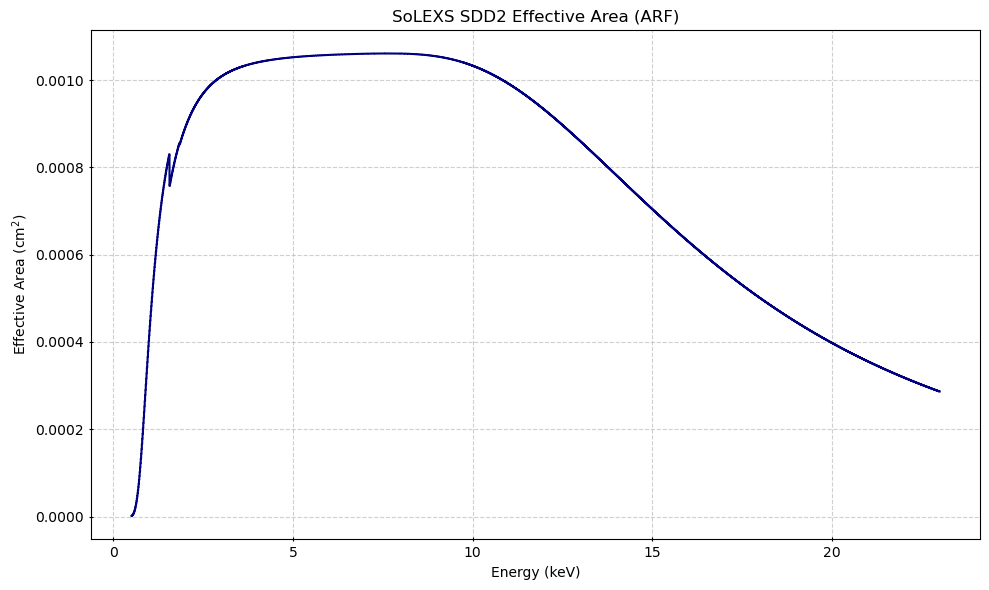

In [17]:
# Load ARF file
#arf_filename = '/Users/prakhar/Software/solexs_tools-1.1/CALDB/arf/solexs_arf_SDD2_v1.arf'
hdus_arf = fits.open(arf_filename)
print(hdus_arf.info())

#print(hdus_arf[1].header)
arf_data = hdus_arf[1].data
print(arf_data.columns)
# Extract columns
energy_lo = arf_data['ENERG_LO']
energy_hi = arf_data['ENERG_HI']
specresp = arf_data['SPECRESP']

energy_mid = (energy_lo + energy_hi) / 2

fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(energy_mid, specresp, drawstyle='steps-mid', color='navy')
ax.set_xlabel('Energy (keV)')
ax.set_ylabel('Effective Area (cm$^2$)')
ax.set_title('SoLEXS SDD2 Effective Area (ARF)')
ax.grid(True, linestyle='--', alpha=0.6)
ax.tick_params(axis='both', direction='inout')
#ax.set_xlim(energy_mid[0], energy_mid[-1])
#plt.savefig('solexs_sdd2_arf_plot.png', dpi=150)
#plt.savefig("/home/solararies/Documents/lightcurve.png",dpi=300)

plt.tight_layout()
plt.show()

## Redistribution Matrix File (RMF)

What is an RMF?
The RMF (Redistribution Matrix File) tells you:

"If a photon of a certain energy hits the detector, which channel (or bin) will it most likely be recorded in?" 

Because detectors aren’t perfect, a photon with a true energy of 6 keV might show up as 5.9 keV or 6.1 keV due to noise, resolution limits, or other effects.

So the RMF describes:

For each incident energy bin , what is the probability distribution over the observed PHA/PI channels ?
This is a 2D matrix , but stored in a compact way for efficiency.

An RMF (Redistribution Matrix File) is essentially a probability matrix that tells you how incoming photon energies are redistributed into detector channels (pulse height bins). It encodes how the detector responds to photons of different energies — for example, due to instrumental effects like limited energy resolution or charge-sharing in pixels.

/var/folders/8z/qff62nwx4gv92r7qzmrpmh7m0000gn/T/ipykernel_22400/898827474.py:41: RuntimeWarning: divide by zero encountered in log10
  X, Y, np.log10(rmf_full ),


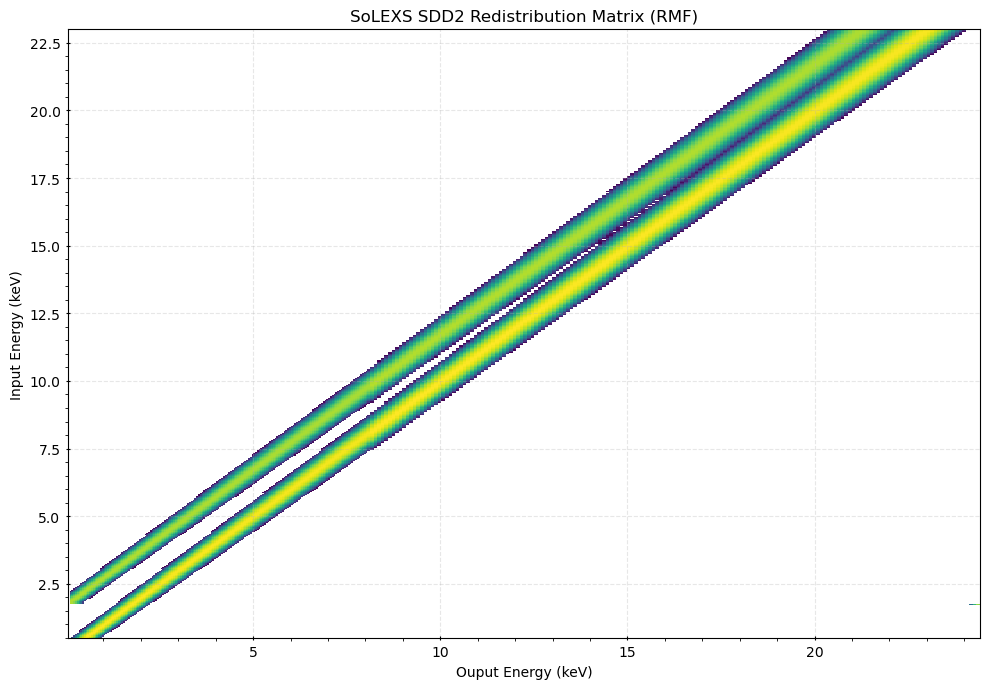

In [41]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits

# --- Open RMF file ---
with fits.open(rmf_filename) as hdus_rmf:
    ebounds_data = hdus_rmf['EBOUNDS'].data
    e_out_min = ebounds_data['E_MIN']
    e_out_max = ebounds_data['E_MAX']
    e_out_center = (e_out_min + e_out_max) / 2

    matrix_data = hdus_rmf['MATRIX'].data
    true_energy_lo = matrix_data['ENERG_LO']
    true_energy_hi = matrix_data['ENERG_HI']
    true_energy_center = (true_energy_lo + true_energy_hi) / 2

    f_chan = matrix_data['F_CHAN']
    n_chan = matrix_data['N_CHAN']
    matrix_values = matrix_data['MATRIX']

# --- Build full redistribution matrix ---
n_true = len(true_energy_center)
n_out = len(e_out_center)
rmf_full = np.zeros((n_true, n_out))

for i in range(n_true):
    start = f_chan[i]
    nch = n_chan[i]
    vals = np.array(matrix_values[i]).ravel()

    use_len = min(len(vals), nch, n_out - start)
    rmf_full[i, start:start+use_len] = vals[:use_len]

# --- Plot with pcolormesh ---
fig, ax = plt.subplots(figsize=(10, 7))

# 2D grids for nonuniform energy bins
X, Y = np.meshgrid(e_out_min, true_energy_lo)

pcm = ax.pcolormesh(
    X, Y, np.log10(rmf_full ),
    shading='auto',
    cmap='viridis'
)

ax.set_xlabel('Ouput Energy (keV)')
ax.set_ylabel('Input Energy (keV)')
ax.set_title('SoLEXS SDD2 Redistribution Matrix (RMF)')
ax.tick_params(direction='inout')
ax.minorticks_on()
ax.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()
